In [2]:
import numpy as np 
import torch 
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F 
from torch.utils.data import Dataset, DataLoader 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST('./data', train = True, download = True, 
                       transform = transform )

test_dataset = datasets.MNIST('./data', train = False, download = True, 
                       transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=False)

torch.Size([10, 1, 28, 28]) torch.Size([10])


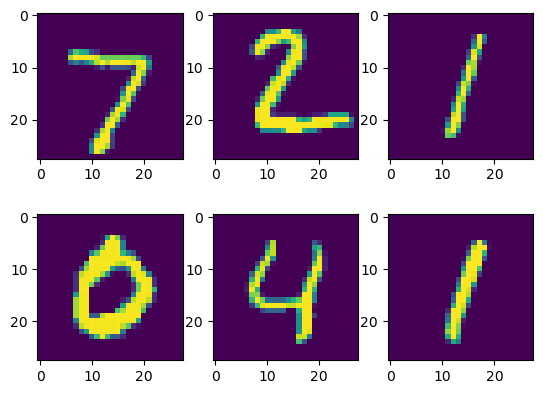

In [6]:
examples = iter(test_loader)
example_data, example_targets = next(examples)
print(example_data.shape, example_targets.shape)


for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0])
plt.show()

In [5]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0 , 9:0}

for data in train_loader:
      Xs, ys = data 
      for y in ys:
            counter_dict[int(y)] += 1
            total += 1
            
print(counter_dict, total)

for i in counter_dict:
      print(f'{i}: {(counter_dict[i] / total * 100):.3f} %')

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949} 60000
0: 9.872 %
1: 11.237 %
2: 9.930 %
3: 10.218 %
4: 9.737 %
5: 9.035 %
6: 9.863 %
7: 10.442 %
8: 9.752 %
9: 9.915 %


In [6]:
# Определение архитектуры нейронной сети
class Net(nn.Module):
      def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(28*28, 64)
            self.fc2 = nn.Linear(64, 64)
            self.fc3 = nn.Linear(64, 64)
            self.fc4 = nn.Linear(64, 10)
            
      def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = self.fc4(x)      
            
            return F.log_softmax(x, dim = 1)
      
      
# Инициализация модели, оптимизатора и функции потерь
model = Net()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()


# Обучение модели
EPOCHS = 5
for epoch in range(EPOCHS):
      model.train()
      for data, target in train_loader: # 10 features, 10 targets
            optimizer.zero_grad()
            output = model(data.view(-1, 28*28))
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
      print(f"Loss {epoch + 1}:  {loss}")
      
      
# Оценка модели на тестовом наборе данных
model.eval()
correct = 0
total = 0
with torch.no_grad():
      for data , target in train_loader:
            output = model(data.view(-1, 784))
            for idx , i in enumerate(output):
                  if torch.argmax(i) == target[idx]:
                        correct += 1
                  total += 1

print('Test accuracy: {:.2%}'.format(correct / total))

Loss 1:  0.20867402851581573
Loss 2:  0.24208013713359833
Loss 3:  0.6584407091140747
Loss 4:  0.0393049493432045
Loss 5:  0.0015584814827889204
Test accuracy: 96.66%
